In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib import colors as clrs
import matplotlib as mpl
%matplotlib inline

In [65]:
def split_npy_path(Hist2D_str):
    #Hist2D_str: string of .npy file location
    new_str = Hist2D_str.split('/')[-1].split('.npy')[0]
    str_pieces = new_str.split('_')[:]
    zen_bin_low = float(str_pieces[3]) 
    zen_bin_width = 0.05
    dep_bin_low = float(str_pieces[5])
    dep_bin_width = 0.05
    if dep_bin_low == 2.0: #dust layer 2.0 - 2.10 km
        dep_bin_width = 0.10
    dep_bin_upp = str(np.round(dep_bin_low + dep_bin_width,2))
    if (dep_bin_upp[-1]) != 0:
        dep_bin_upp = dep_bin_upp + '0'
    zen_bin_upp = str(np.round(zen_bin_low + zen_bin_width,2))
    if (zen_bin_upp[-1]) != 0:
        zen_bin_upp = zen_bin_upp + '0'
    plt_str = str_pieces[0] + '_' +str_pieces[1] +'_'+ str_pieces[2]+ '_'+ str_pieces[3] + '-' + (zen_bin_upp) + '___' + str_pieces[4] + '_' + str_pieces[5] + '-'+(dep_bin_upp) + str('km')
    return plt_str

def Make_Single_Muon_Hist_and_Spline(Hist2D_str,
                                     E_mu_bins = np.logspace(-1,8,10+1),
                                     E_nu_bins = np.logspace(1,8,10+1),
                                     gridpts_mu = np.logspace(-1,8,31+1),
                                     gridpts_nu = np.logspace(1,8,31+1),
                                     spline_method = 'linear',
                                     vmin = 10**(-4),
                                     vmax = 1
                                    ) :
    #Hist2D_str: string of .npy file location
    #E_mu_bins: muon energy bins
    #E_nu_bins: neutrino energy bins
    #gridpts_mu: muon energy splining bins
    #gridpts_nu: neutrino energy splining bins
    #spline_method: griddata spline method input: linear, cubic, nearest
    #vmin: normalization minimum for colorbar scale
    #vmax: normalization maximum for colorbar scale
    Hist2D = np.load(Hist2D_str)
    E_mu_bins=E_mu_bins
    E_nu_bins=E_nu_bins
    mu_bin_centers = np.sqrt(E_mu_bins[:-1] * E_mu_bins[1:])
    nu_bin_centers = np.sqrt(E_nu_bins[:-1] * E_nu_bins[1:])
    ticks = np.logspace(1,8,8)
    mask=np.where(Hist2D!=0)

    ##Spline Linear Interpolation##
    xv, yv=np.meshgrid((nu_bin_centers),(mu_bin_centers))
    gridpts_nu= gridpts_nu
    gridpts_mu = gridpts_mu
    plotx,ploty=np.meshgrid((gridpts_nu),(gridpts_mu))
    grid_z1 = griddata((xv[mask],yv[mask]), Hist2D[mask], (plotx,ploty), method=spline_method)
    ###############################
    
    f, ax = plt.subplots(1,2,figsize=(10,5), dpi = 300)
    mpl.rcParams["font.family"] = 'monospace'
    COLOR = 'black'
    mpl.rcParams['text.color'] = COLOR
    mpl.rcParams['axes.labelcolor'] = COLOR
    mpl.rcParams['xtick.color'] = COLOR
    mpl.rcParams['ytick.color'] = COLOR

    im=ax[0].pcolormesh(E_nu_bins, E_mu_bins,Hist2D.T,cmap='turbo',norm=clrs.LogNorm(vmin=vmin, vmax=vmax))
    ax[0].set_title('Original Histogram')
    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[0].set_xlabel('Energy of Shower Neutrino(GeV)')
    ax[0].set_ylabel('Energy of Leading Muon (GeV)')
    ax[0].set_xticks(ticks=ticks)
    ax[0].set_yticks(ticks=ticks)

    ax[0].set_xlim(10**1,10**8)
    ax[0].set_ylim(10**1,10**8)

    im=ax[1].pcolormesh(plotx, ploty,grid_z1.T,cmap='turbo',norm=clrs.LogNorm(vmin=vmin, vmax=vmax))
    ax[1].set_title('Linear Interpolation')
    ax[1].set_xscale('log')
    ax[1].set_xlabel('Energy of Shower Neutrino (GeV)')
    ax[1].set_ylabel('Energy of Leading Muon (GeV)')
    ax[1].set_yscale('log')
    ax[1].set_xlim(10**1,10**8)
    ax[1].set_ylim(10**1,10**8)
    ax[1].set_xticks(ticks=ticks)
    ax[1].set_yticks(ticks=ticks)

    cbar_ax = f.add_axes([.93, 0.15, 0.05, 0.7])
    f.colorbar(im,cax=cbar_ax )
    plt_str = split_npy_path(Hist2D_str)
    plt.suptitle(plt_str)
    plt.savefig(plt_str + '.png',dpi=300)
    plt.show()

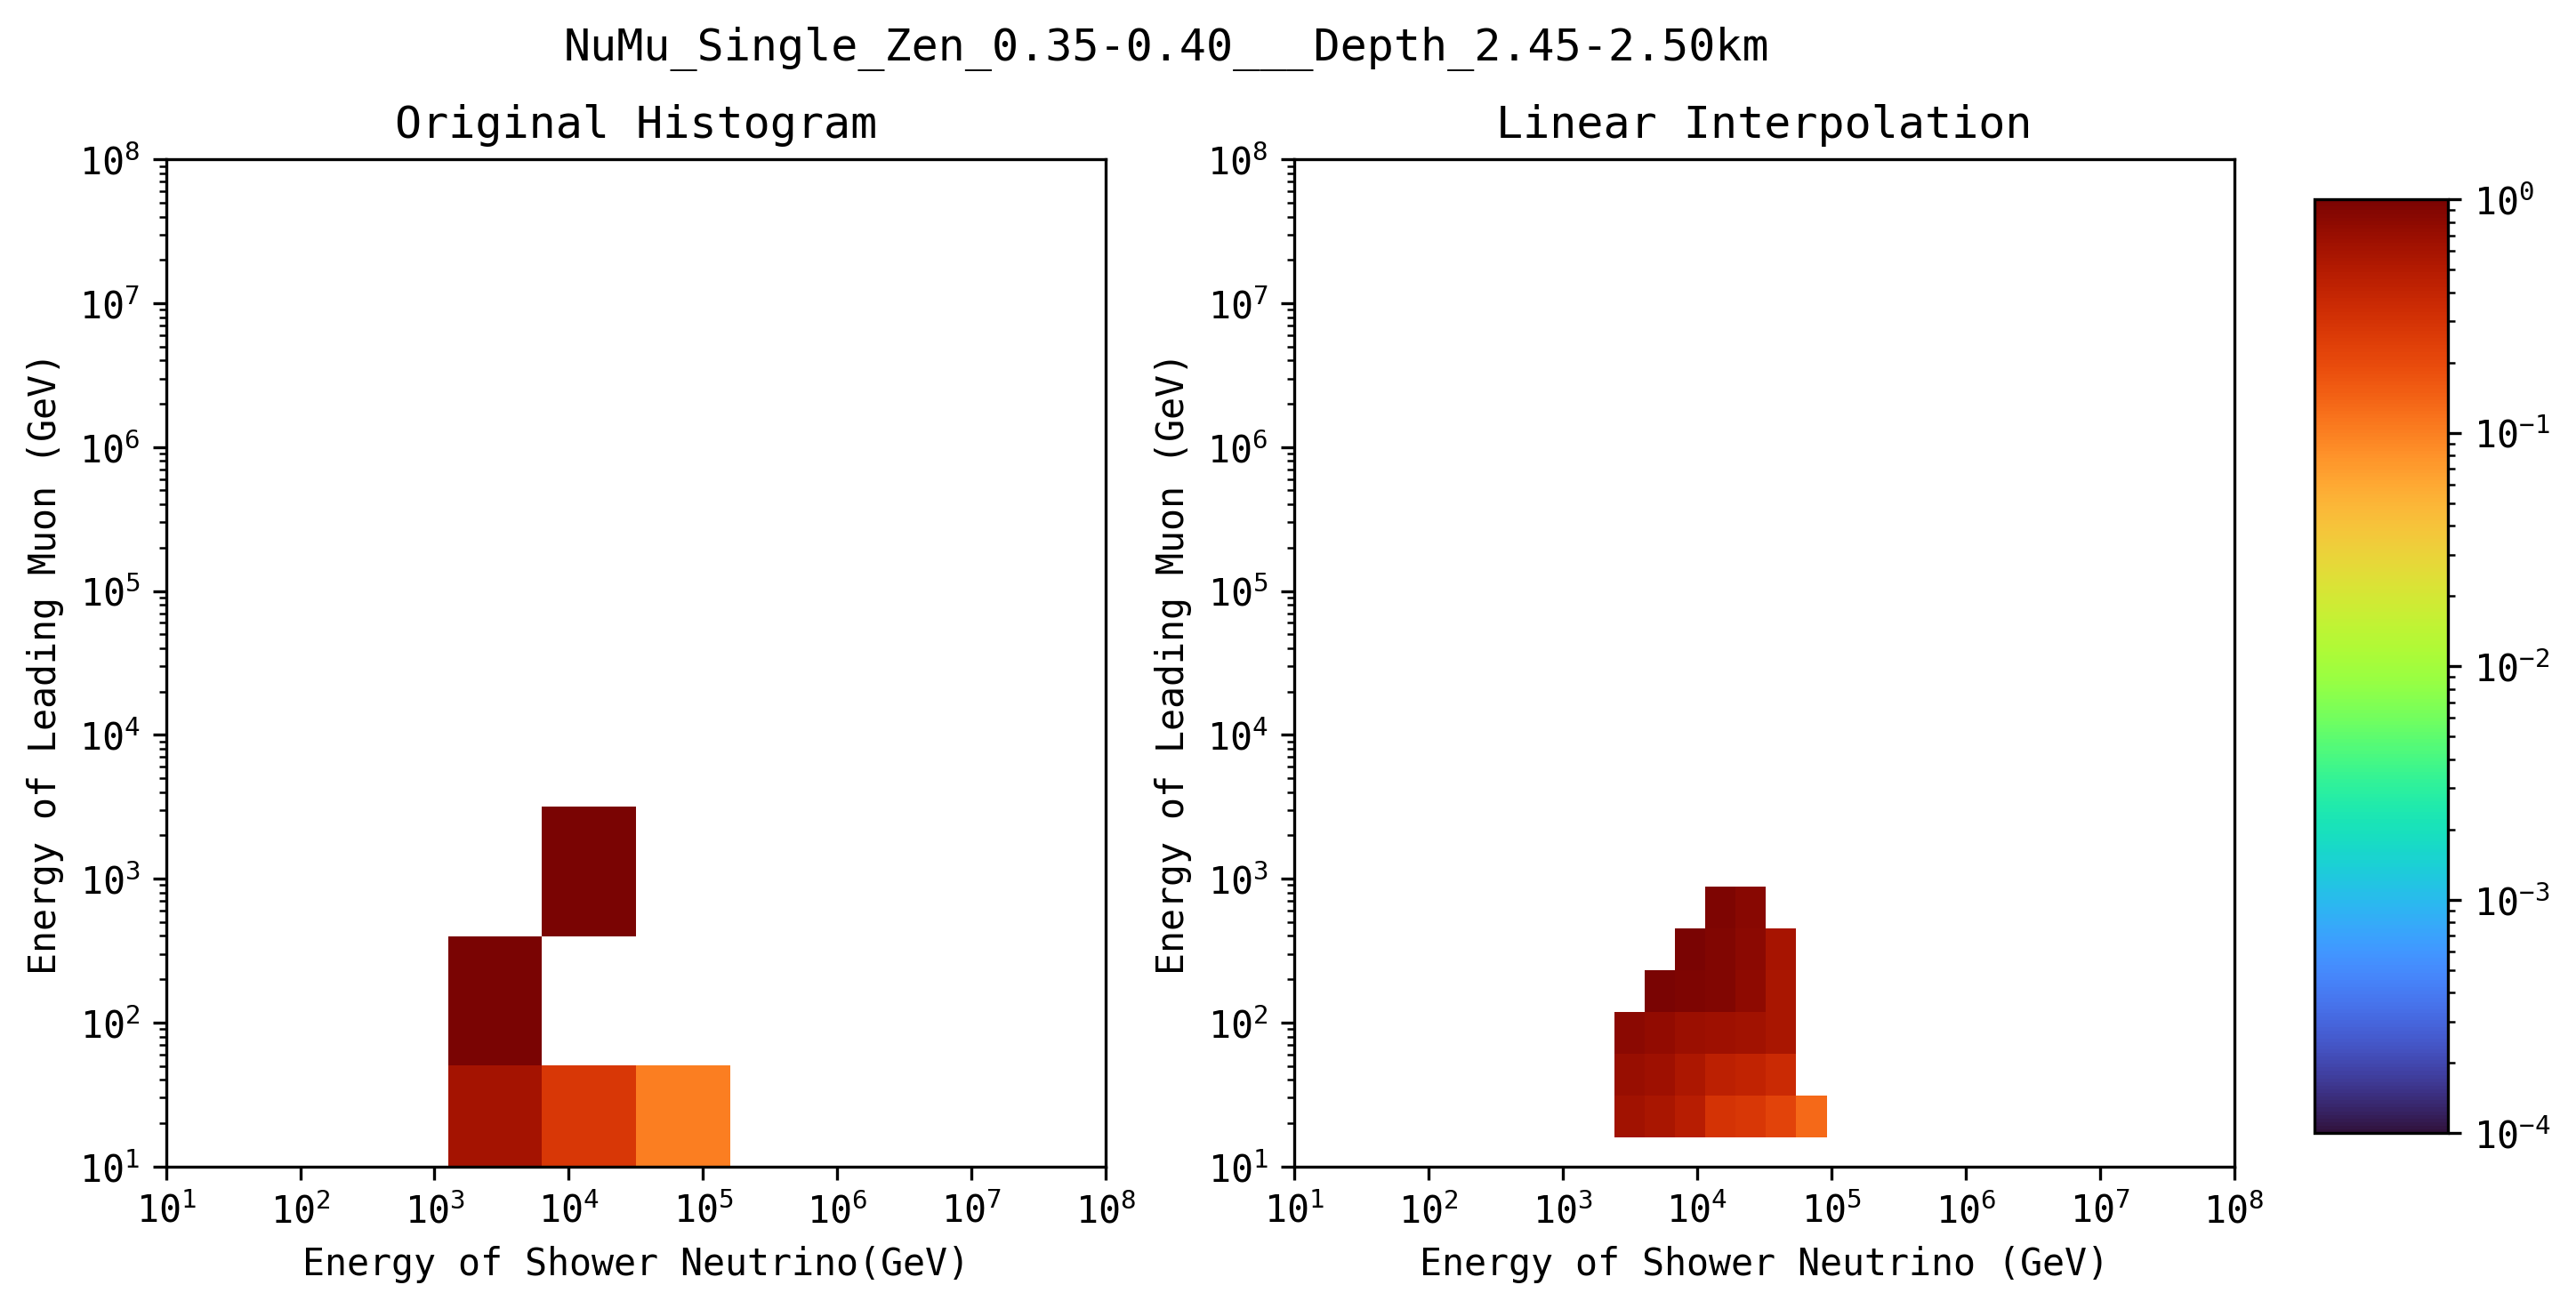

In [66]:
Make_Single_Muon_Hist_and_Spline('/home/zrechav/scripts/air_shower_reader/single_histogram_making/histograms/NuMu_Single_Zen_0.35_Depth_2.45.npy')

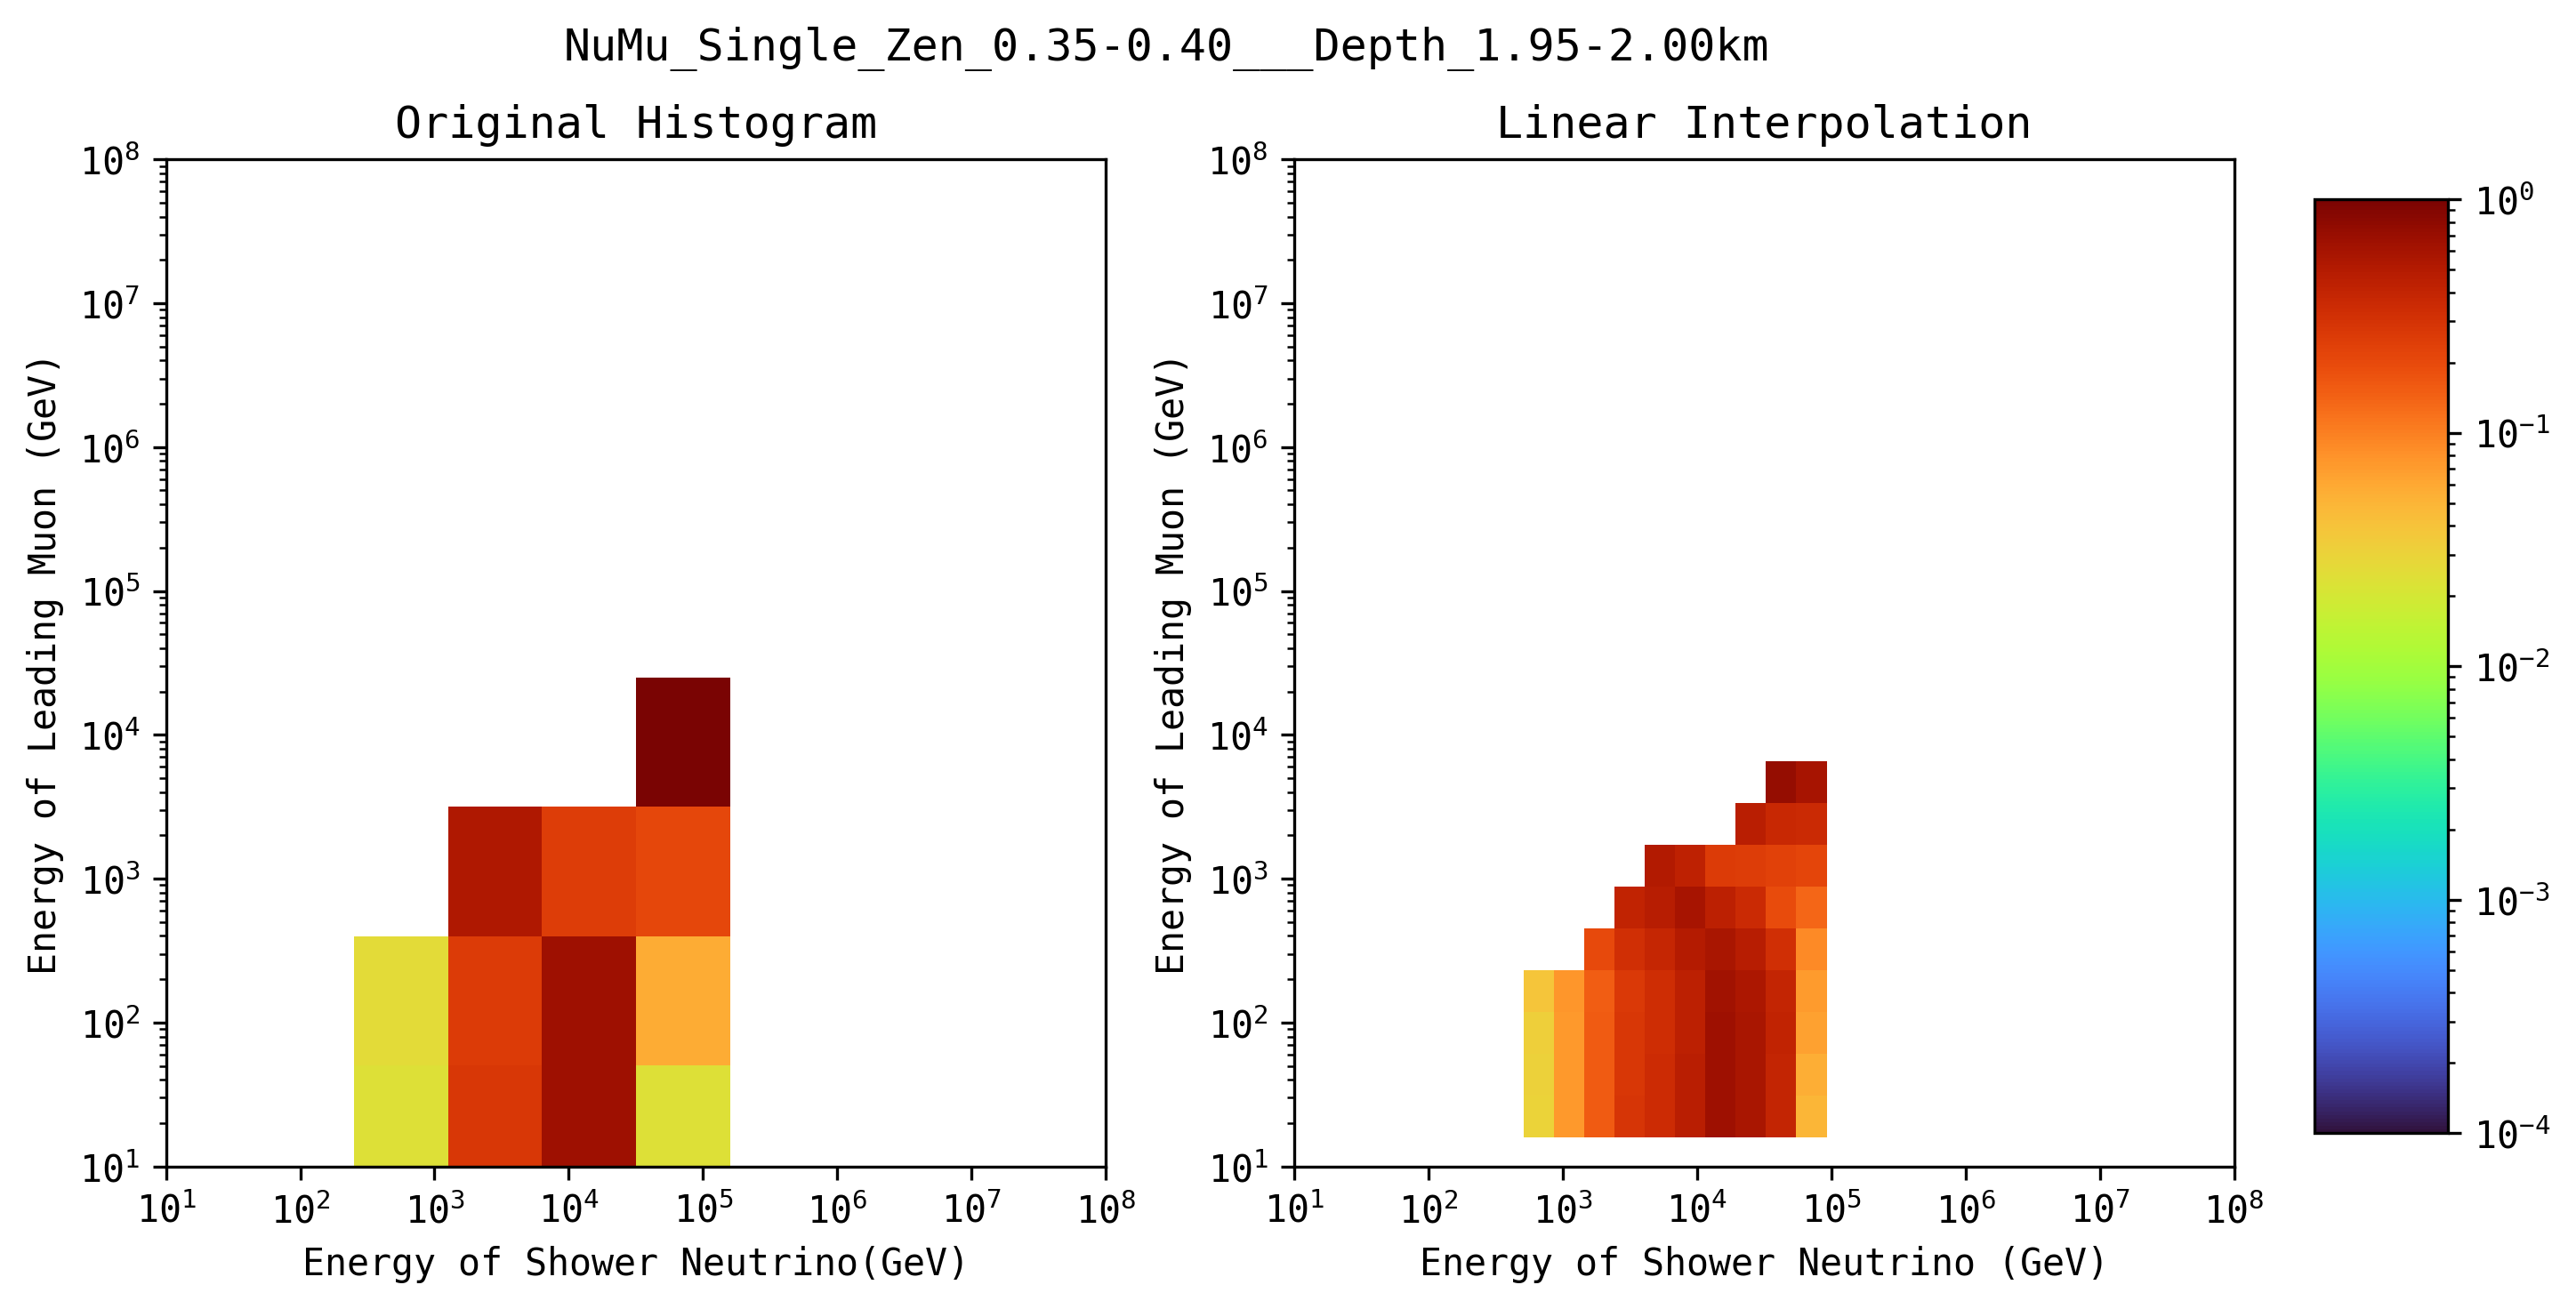

In [67]:
Make_Single_Muon_Hist_and_Spline('/home/zrechav/scripts/air_shower_reader/single_histogram_making/histograms/NuMu_Single_Zen_0.35_Depth_1.95.npy')

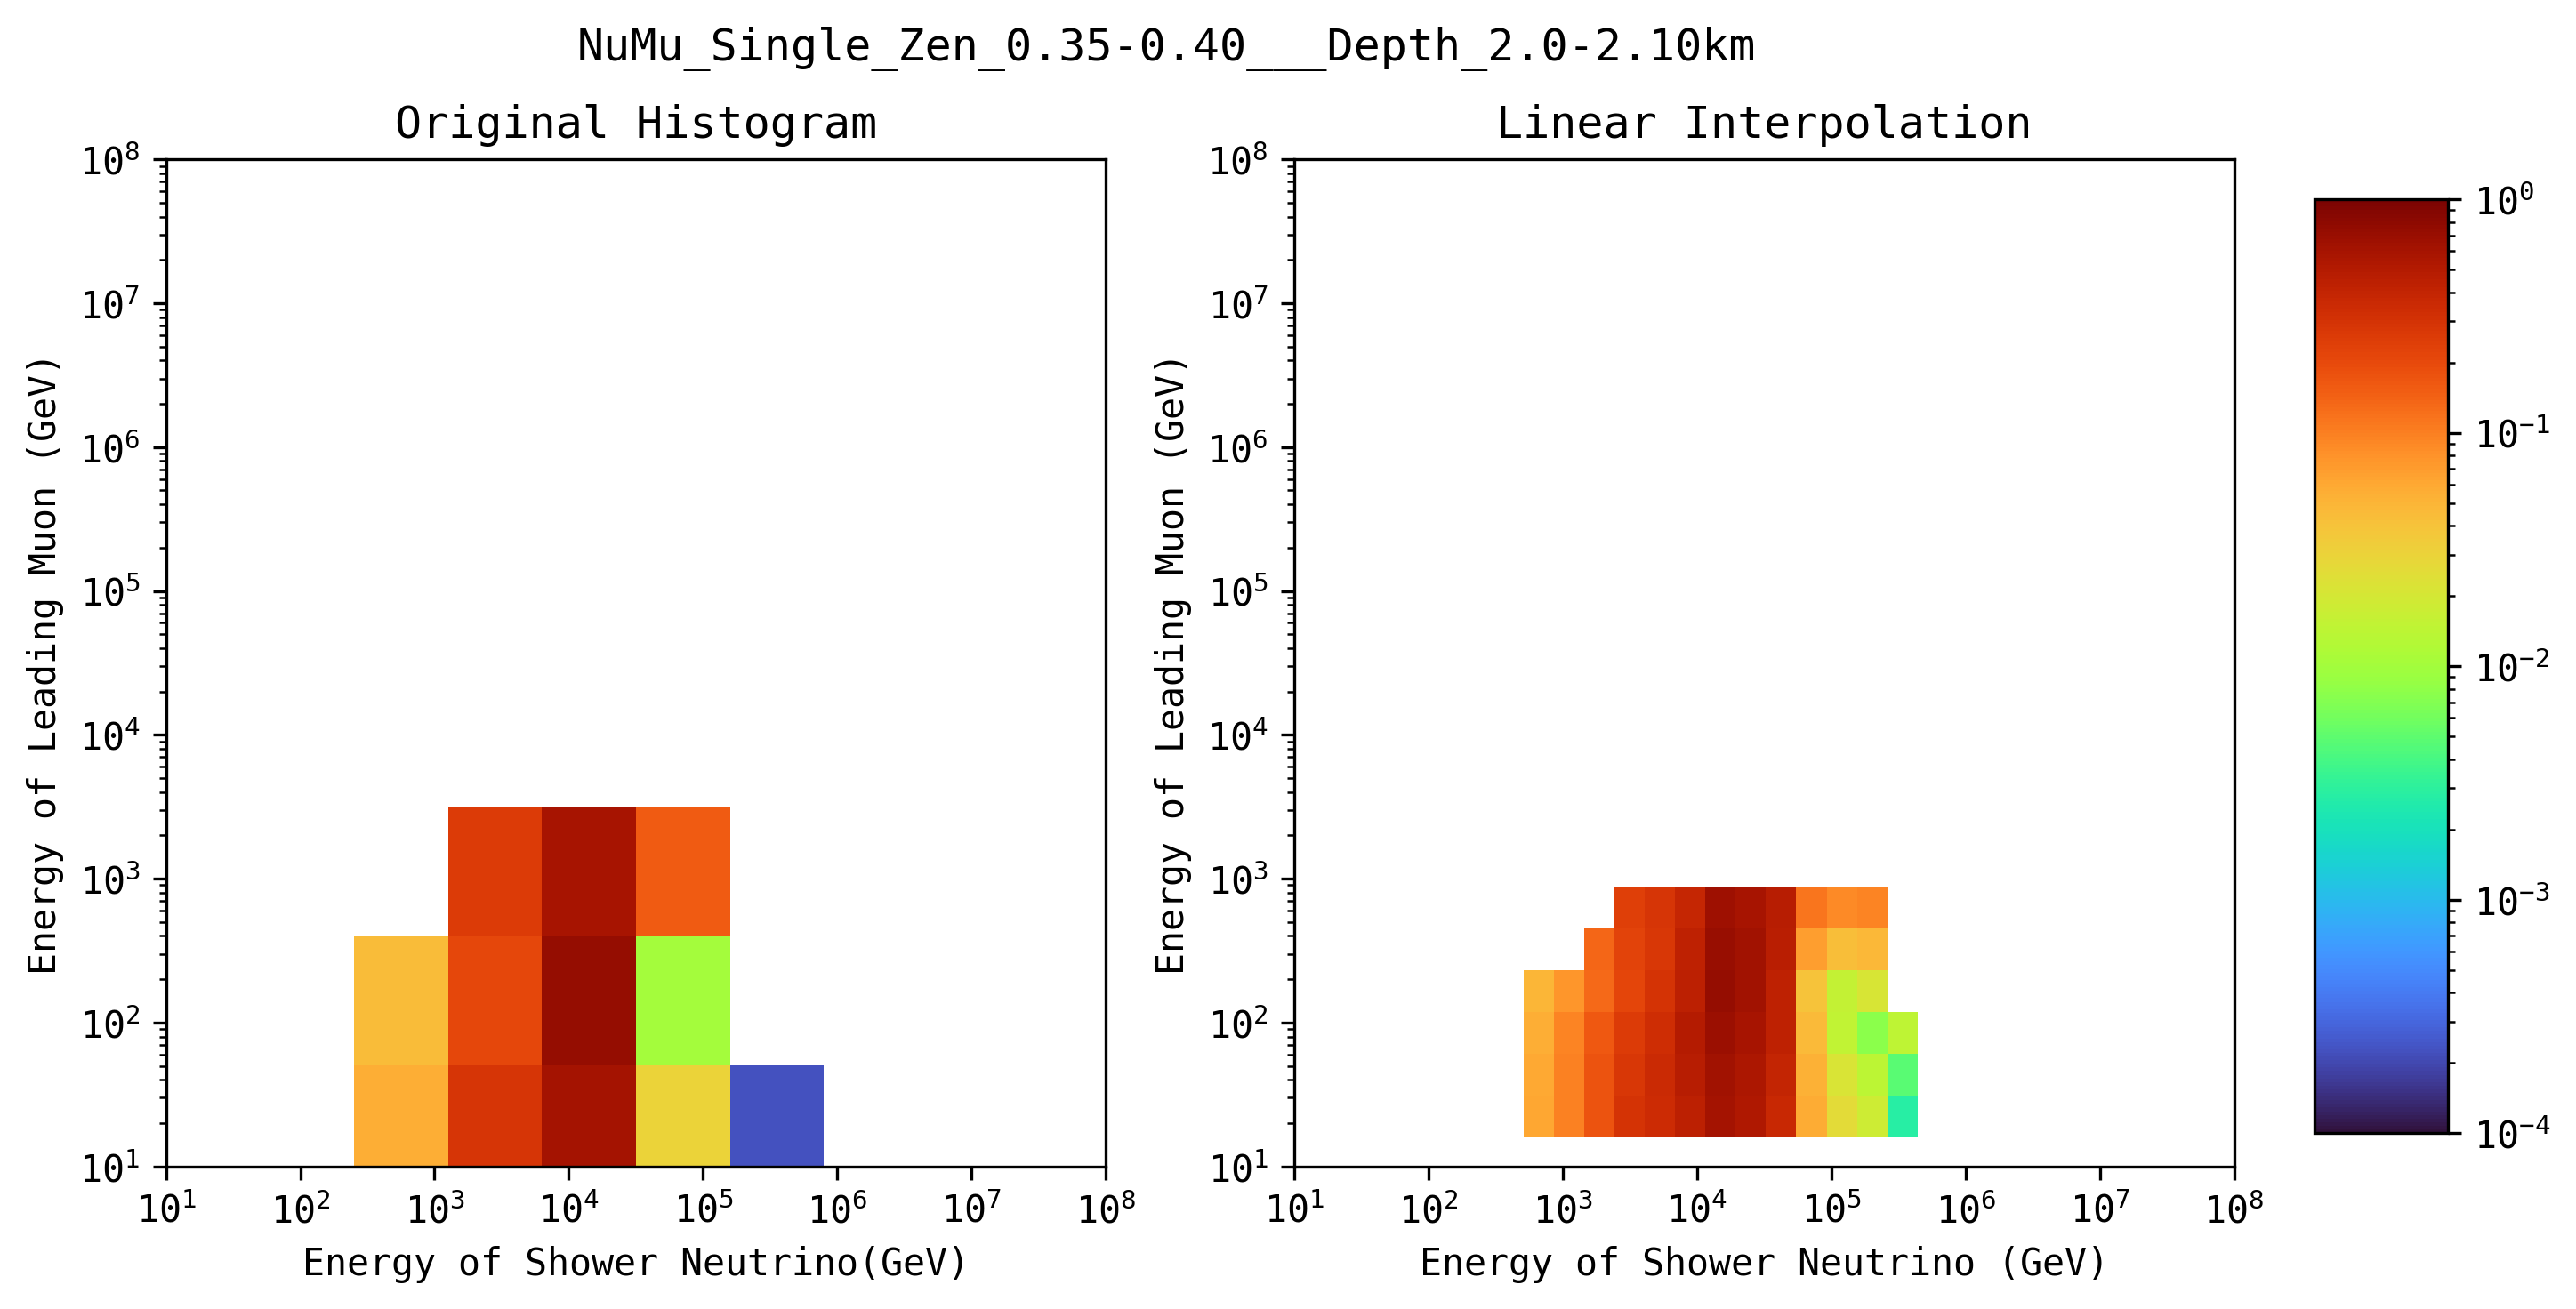

In [68]:
Make_Single_Muon_Hist_and_Spline('/home/zrechav/scripts/air_shower_reader/single_histogram_making/histograms/NuMu_Single_Zen_0.35_Depth_2.0.npy')